In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import statsmodels.api as sm

In [122]:
data = pd.read_excel("Dados_Atividade.xlsx")
data

,Carvão (%),Resistência (Mpa)
0,0.0,43.6
1,1.2,42.3
2,2.2,42.2
3,3.1,42.3
4,4.4,41.5
...,...,...
65,7.1,40.7
66,5.9,39.9
67,1.7,42.2
68,8.1,40.8


# 1. Construa um diagrama de dispersão e calcule o coeficiente de correlação. Interprete o gráfico e o resultado do coeficiente

In [123]:
coal = data["Carvão (%)"].to_list()
resistance = data["Resistência (Mpa)"].to_list()

[]

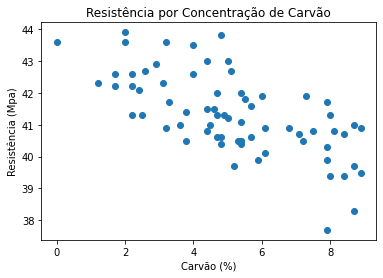

In [124]:
plt.scatter(x = coal, y = resistance)
plt.title("Resistência por Concentração de Carvão")
plt.xlabel("Carvão (%)")
plt.ylabel("Resistência (Mpa)")

plt.plot()

In [125]:
z = np.polyfit(coal,resistance,1) # Returns the least squares of a polinomial fit
#resistance_hat = np.poly1d(z)(coal)
correlation_coeficient = pearsonr(coal, resistance)[0]

df = pd.DataFrame([correlation_coeficient], columns = ["Valor"],index = ["Coeficiente de Correlação"])
df

,Valor
Coeficiente de Correlação,-0.665792


# 2.Escreva o modelo matemático teórico de regressão.

In [126]:
x = np.array(coal).reshape(-1,1) # x must be two dimensional, or better, x must one column and many rows as necessary
y = resistance

# Creating the model
model = LinearRegression().fit(x,y)
"""
fit_intercept(Boolean): if True, decides to calculate the intercept 𝑏₀ or, if False, considers it equal to zero. It defaults to True.
normalize(Boolean): if True, decides to normalize the input variables. It defaults to False, in which case it doesn’t normalize the input variables.
copy_X(Boolean): that decides whether to copy (True) or overwrite the input variables (False). It’s True by default.
n_jobs(int or None): It represents the number of jobs used in parallel computation. It defaults to None, which usually means one job. -1 means to use all available processors.
"""

r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {model.intercept_}")

print(f"slope: {model.coef_}")

"""
 OBS :  In scikit-learn, by convention, a trailing underscore indicates that an attribute is estimated. In this example, .intercept_ and .coef_ are estimated values
"""

coefficient of determination: 0.44327900643152895
intercept: 43.287584930029325
slope: [-0.38343804]


'\n OBS :  In scikit-learn, by convention, a trailing underscore indicates that an attribute is estimated. In this example, .intercept_ and .coef_ are estimated values\n'

In [127]:
print("O modelo teórico de regressão é dado pela relação : ")
print()
print("y = b0 + b1 * x")

O modelo teórico de regressão é dado pela relação : 

y = b0 + b1 * x


# 3 .Estime os parâmetros do modelo de regressão apresentado no item “b” e escreva o modelo estimado.

In [128]:
regression_func = f"y = {model.intercept_:0.3f} + {model.coef_[0]:0.3f} *x"

print("Nosso modelo estimado é :")
print()
print(f"y = {model.intercept_:0.3f} + {model.coef_[0]:0.3f} *x")

Nosso modelo estimado é :

y = 43.288 + -0.383 *x


array([35.61882407])

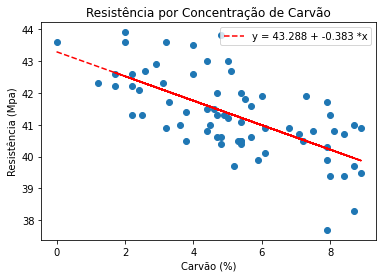

In [144]:
p = np.poly1d([0, model.coef_[0],model.intercept_]) # creates the polinome for the trendline


plt.scatter(x = coal, y = resistance)
plt.title("Resistência por Concentração de Carvão")
plt.xlabel("Carvão (%)")
plt.ylabel("Resistência (Mpa)")

#add trendline to plot
plt.plot(x, p(x),"--r", label=regression_func)
plt.legend(loc = "upper right")


# Análise dos resíduos do modelo EXTRA

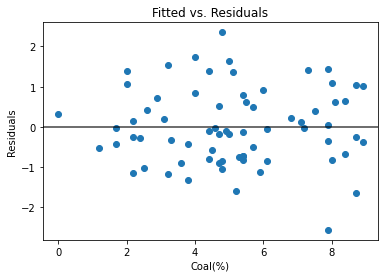

In [146]:
residuals = resistance - model.predict(x)
"""
 We can realize here that the residuals doesn't have any trend, so that supports our built model
"""

# Plot the fitted v residuals graph
plt.scatter(coal, residuals)
plt.ylabel("Residuals")
plt.xlabel("Coal(%)")
plt.axhline(y=0, c='black', alpha=.75)
plt.title('Fitted vs. Residuals')
plt.show()

